In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/musaidriss/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_UK = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_DA_UK['job_posted_month_no'] = df_DA_UK['job_posted_date'].dt.month

df_DA_UK_explode = df_DA_UK.explode('job_skills')

In [33]:
df_DA_UK_Pivot = df_DA_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_UK_Pivot.loc['Total'] = df_DA_UK_Pivot.sum()

df_DA_UK_Pivot[df_DA_UK_Pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_UK_Pivot.drop('Total')

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1,0,8,0,0,1,0,10,26,1,...,0,16,9,3,0,0,2,0,28,0
2,0,0,7,0,0,0,0,8,28,2,...,0,7,2,0,2,0,4,0,16,0
3,0,0,2,0,0,0,0,7,13,0,...,0,10,0,1,0,0,2,0,10,1
4,1,0,2,0,0,0,0,7,9,0,...,0,5,0,1,0,0,3,0,10,0
5,2,0,3,0,0,1,0,8,16,0,...,0,7,3,0,0,0,0,0,8,0
6,1,0,1,0,1,0,1,15,19,0,...,0,9,2,0,0,0,1,0,12,0
7,2,0,1,0,0,0,0,13,31,0,...,0,9,0,1,2,0,3,0,16,0
8,0,0,0,0,0,0,0,9,17,0,...,0,7,0,1,1,0,4,1,11,0
9,2,0,4,1,0,0,1,17,24,0,...,0,25,0,5,1,1,1,0,13,1


In [34]:
DA_totals = df_DA_UK.groupby('job_posted_month_no').size()

In [38]:
# sorts by count
df_DA_UK_Pivot.loc['Total'] = df_DA_UK_Pivot.sum()
df_DA_UK_Pivot = df_DA_UK_Pivot[df_DA_UK_Pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_UK_Pivot = df_DA_UK_Pivot.drop('Total')

df_DA_UK_Pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,drupal,assembly,monday.com,pytorch,node,powerbi,unreal,terraform,watson,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,255,226,157,95,91,50,74,26,15,32,...,0,0,0,0,1,0,0,0,0,0
2,182,162,92,61,57,37,38,28,14,16,...,0,0,0,0,0,0,0,0,0,0
3,119,105,71,47,50,31,14,13,18,11,...,0,0,0,0,0,0,0,0,0,0
4,84,78,46,40,28,17,24,9,11,7,...,0,0,0,0,0,1,0,0,0,0
5,114,84,59,30,29,18,8,16,12,9,...,0,0,0,0,0,0,0,0,0,0
6,102,95,79,36,37,17,8,19,12,17,...,0,1,0,0,0,0,0,0,0,0
7,131,113,97,52,42,29,34,31,14,18,...,1,0,0,0,0,0,0,0,0,0
8,109,78,64,39,39,16,10,17,13,7,...,0,0,0,0,0,0,0,0,0,1
9,211,167,130,99,87,58,24,24,15,11,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_UK_percent = df_DA_UK_Pivot.div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,drupal,assembly,monday.com,pytorch,node,powerbi,unreal,terraform,watson,wire
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000
May,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.465116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.395257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.471698
Sep,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271003,0.000000


In [43]:
df_plot = df_DA_UK_percent.iloc[:, :5]

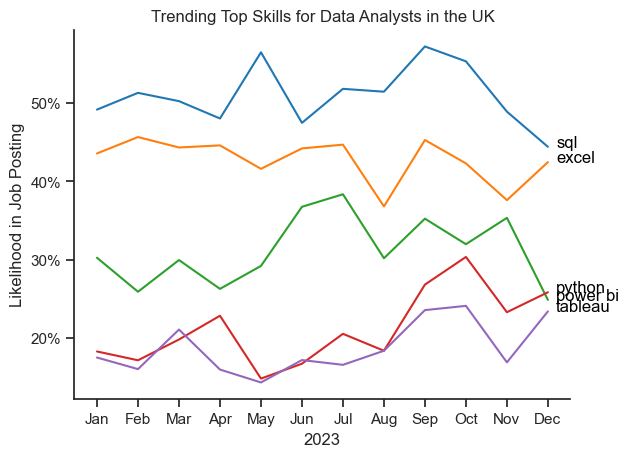

In [48]:
from matplotlib.ticker import PercentFormatter

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()